In [5]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
import nltk

from collections import Counter
from typing import List

import seaborn
seaborn.set(palette='summer')

In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Подготовка данных

In [8]:
df = pd.read_csv(r'medium_articles.csv')
df.fillna("None", inplace=True)
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [9]:
test

,title,text,url,authors,timestamp,tags
51649,2018: Is the Crypto HYPE real?,→ Flagman\n\nIt seems logical to start the inv...,https://medium.com/cc-connecting-crypto-with-b...,[],2018-01-25 10:55:14.696000+00:00,"['Bitcoin', 'Adoption', 'Humor', 'Cryptocurren..."
68568,Liberal Arts Blog — the Brain — What is the Mo...,Liberal Arts Blog — Wednesday is the Joy of Sc...,https://medium.com/@john-muresianu/liberal-art...,['John Muresianu'],2020-12-09 13:57:22.716000+00:00,"['Phisiology', 'Education', 'Liberal Arts Blog..."
176024,Month one is a wrap!! #WenHop,We want to give a huge shout out to our early ...,https://medium.com/@marseconomy/month-one-is-a...,['Mars Economy'],2021-06-17 20:05:16.168000+00:00,"['Entrepreneurship', 'Mars', 'Cryptocurrency',..."
59788,10 Principles For Schools of Modern Learning,It’s time to raise the bar on our conversation...,https://medium.com/modern-learning/10-principl...,['Will Richardson'],2017-01-31 15:51:54.291000+00:00,"['Education', 'Tech', 'Learning', 'Change']"
58637,Narcissistic Sociopathy of Wealth,Seeking Arrangement and tech bro CEO’s fashion...,https://ljgolden55.medium.com/narcissistic-soc...,['Lester Golden'],2020-12-29 11:35:54.699000+00:00,"['Wealth', 'Capitalism', 'Sex', 'Love', 'Relat..."
...,...,...,...,...,...,...
186500,Start your 3D printing journey with 50 pre-sup...,Boost your 3D printing and RPG experience with...,https://medium.com/@Humble_Bundle_Partner_Blog...,['Humble Bundle Partner Blog'],2021-11-23 14:30:58.037000+00:00,"['Fantasy', 'Dnd', 'Rpg', 'Dungeons And Dragon..."
111612,Soren Sadr,The cover of Bartleby the Scrivener: A Story o...,https://medium.com/@sorensadr/soren-sadr-e521a...,['Soren Sadr'],2020-12-01 16:02:53.295000+00:00,"['Socialism', 'Personal Growth', 'Personal Cho..."
178333,Yoga Women’s Clothing — Flex and Comfy leggings,"Leggings, a close cousin of jeans, are one of ...",https://medium.com/@best100en/yoga-womens-clot...,['Camilla Perini'],2021-04-25 20:31:55.980000+00:00,['Clothing']
96893,What is your relationship to hope right now?,"At the end of 2020,\n\n1 week from the shortes...",https://medium.com/@flipflopstosnowshoes/what-...,['Flip Flops To Snow Shoes'],2020-12-15 04:42:54.455000+00:00,"['Reflection', 'Prompt', 'Meditation', 'Hope',..."


In [10]:
sentences = []

for sentence in test['text']:
    sentences.extend([x.lower() for x in sent_tokenize(sentence) if len(x) < 128])

In [11]:
sentences

['→ flagman\n\nit seems logical to start the investigation from the roots.',
 'the largest cryptocurrency bitcoin has just celebrated its 9th birthday and is not planning on going anywhere.',
 'currently being valued at around $12,000 usd, crypto ‘patient zero’ has enjoyed 1,470% rise in 2017.',
 'what doesn’t kill you, really makes you stronger and apparently, more expensive.',
 'patient zero has passed the hype check-up.',
 'it’s real.',
 'from what it’s worth the ico trend does not seem to slow down either and will likely continue in the upcoming future.',
 'crypto team roster is getting longer and stronger but only looks won’t suffice: they will have to prove themselves in court.',
 'ball is life and crypto team is currently on hype.',
 'waiting queues are getting longer than during the release of a new iphone.',
 'at least you don’t have to camp in a tent on a curb beside an apple store waiting to get on the next best thing.',
 'demand curve is not being met by supply in the marke

In [12]:
len(sentences)

1728618

# Посимвольная токенизация

In [55]:
chars = Counter()

for sentence in sentences:
    for char in sentence:
        chars[char] += 1

In [56]:
chars

Counter({'→': 569,
         ' ': 19565128,
         'f': 2013862,
         'l': 4066574,
         'a': 7732089,
         'g': 2018181,
         'm': 2510136,
         'n': 6644687,
         '\n': 296212,
         'i': 7186033,
         't': 9099192,
         's': 6424591,
         'e': 11880077,
         'o': 7739894,
         'c': 2987073,
         'r': 5766557,
         'h': 4442404,
         'v': 1086147,
         '.': 1632224,
         'y': 2114057,
         'p': 2105653,
         'u': 2997218,
         'b': 1484247,
         'j': 172890,
         'd': 3454081,
         '9': 34284,
         'w': 1959946,
         '$': 12853,
         '1': 113624,
         '2': 101377,
         ',': 910160,
         '0': 142800,
         '‘': 14522,
         'z': 92837,
         '’': 382604,
         '4': 34910,
         '7': 23975,
         '%': 14378,
         'k': 853107,
         'x': 229630,
         '-': 156983,
         ':': 85909,
         'q': 106053,
         '3': 47002,
         '–': 7918

In [57]:
len(chars)

3490

In [58]:
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
counter_threshold = 250

for char, cnt in chars.items():
    if cnt > counter_threshold:
        vocab.add(char)

In [59]:
vocab

{'\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '<bos>',
 '<eos>',
 '<pad>',
 '<unk>',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '£',
 '©',
 '°',
 '²',
 '´',
 '·',
 'á',
 'é',
 'í',
 'а',
 'е',
 'о',
 'с',
 'і',
 '\u200b',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…',
 '→',
 '●',
 '❤',
 '는',
 '다',
 '에',
 '이',
 '하',
 '️'}

In [60]:
len(vocab)

106

In [61]:
char2ind = {char: i for i, char in enumerate(vocab)}
ind2char = {i: char for char, i in char2ind.items()}

In [62]:
class CharDataset:
    def __init__(self, sentences):
        self.data = sentences
        self.unk_id = char2ind['<unk>']
        self.bos_id = char2ind['<bos>']
        self.eos_id = char2ind['<eos>']
        self.pad_id = char2ind['<pad>']

    def __getitem__(self, idx: int) -> List[int]:
        tokenized_sentence = [self.bos_id]
        tokenized_sentence += [char2ind.get(char, self.unk_id) for char in self.data[idx]]
        tokenized_sentence += [self.eos_id]

        return tokenized_sentence

    def __len__(self) -> int:
        return len(self.data)

In [63]:
def collate_fn_with_padding(
    input_batch: List[List[int]], pad_id=char2ind['<pad>']) -> torch.Tensor:
    seq_lens = [len(x) for x in input_batch]
    max_seq_len = max(seq_lens)

    new_batch = []
    for sequence in input_batch:
      new_batch.append(sequence)
      for _ in range(max_seq_len - len(sequence)):
        sequence.append(pad_id)

    sequences = torch.LongTensor(new_batch).to(device)

    new_batch = {
        'input_ids': sequences[:,:-1],
        'target_ids': sequences[:,1:]
    }

    return new_batch

dataset = CharDataset(sentences)
dataloader = DataLoader(dataset, collate_fn=collate_fn_with_padding, batch_size=256)

## Архитектура модели

In [64]:
class CharLM(nn.Module):
    def __init__(self, hidden_dim: int, vocab_size: int):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.rnn = nn.RNN(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, vocab_size)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)
        output, _ = self.rnn(embeddings)
        output = self.dropout(self.linear(self.non_lin(output)))
        projection = self.projection(self.non_lin(output))

        return projection

In [65]:
model = CharLM(hidden_dim=256, vocab_size=len(vocab)).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=char2ind['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

In [66]:
num_epoch = 8
losses = []
#perplexities = []

for epoch in range(num_epoch):
    epoch_losses = []
    model.train()
    print(f'Training epoch {epoch+1}')

    for batch in dataloader:
        optimizer.zero_grad()
        logits = model(batch['input_ids']).flatten(start_dim=0, end_dim=1)
        loss = criterion(logits, batch['target_ids'].flatten())
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())
        #print(f'  Batch Loss: {loss.item()}')

    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1} Average Loss: {epoch_loss}')
    #perplexities.append(evaluate(model, criterion))


Training epoch 1
Epoch 1 Average Loss: 1.5209324857525943
Training epoch 2
Epoch 2 Average Loss: 1.408441792200993
Training epoch 3
Epoch 3 Average Loss: 1.3881366396945936
Training epoch 4
Epoch 4 Average Loss: 1.3775215959012306
Training epoch 5
Epoch 5 Average Loss: 1.3707772631054187
Training epoch 6
Epoch 6 Average Loss: 1.3660154340356505
Training epoch 7
Epoch 7 Average Loss: 1.3625364663176196
Training epoch 8
Epoch 8 Average Loss: 1.359906430670231


In [67]:
def evaluate(model, criterion) -> float:
    model.eval()
    perplexity = []
    with torch.no_grad():
        for batch in dataloader:
            logits = model(batch['input_ids']).flatten(start_dim=0, end_dim=1)
            loss = criterion(
                logits,
                batch['target_ids'].flatten()
                )
            perplexity.append(torch.exp(loss).item())

    perplexity = sum(perplexity) / len(perplexity)

    return perplexity

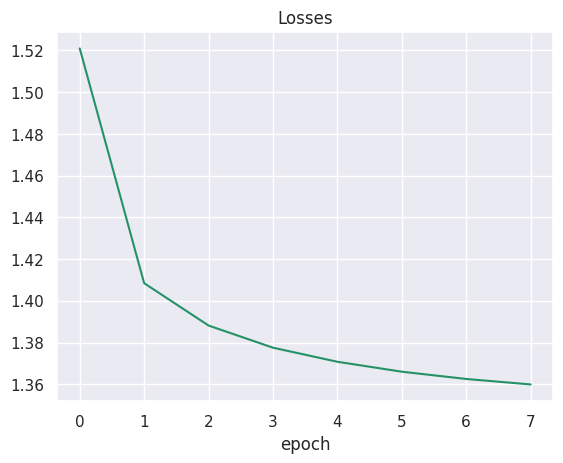

In [68]:
plt.plot(np.arange(len(losses)), losses)
plt.title('Losses')
plt.xlabel("epoch")
plt.show()

## Генерация текста

In [82]:
def greedy_generate(model, starting_seq: str, max_seq_len: int = 32) -> str:
    device = 'cpu'
    model = model.to(device)
    input_ids = [char2ind['<bos>']] + [char2ind.get(char, char2ind['<unk>']) for char in starting_seq]
    input_ids = torch.LongTensor(input_ids).to(device)

    model.eval()
    with torch.no_grad():
        for i in range(max_seq_len):
            next_char_distribution = model(input_ids)[-1]
            next_char = next_char_distribution.squeeze().argmax()
            input_ids = torch.cat([input_ids, next_char.unsqueeze(0)])

            if next_char.item() == char2ind['<eos>']:
                break

    # Исправление: безопасно извлекаем символы
    words = ''.join([ind2char.get(idx.item(), '<unk>') for idx in input_ids])

    return words

In [111]:
test1 = greedy_generate(model, starting_seq='this is ')
test2 = greedy_generate(model, starting_seq='you ')
test3 = greedy_generate(model, starting_seq='the end ')
test4 = greedy_generate(model, starting_seq='a long ')

print(test1)
print(test2)
print(test3)
print(test4)


<bos>this is a strategy and the company and t
<bos>you can also be a strategy and the c
<bos>the end of the company and the company a
<bos>a long time and the company and the com


In [29]:
torch.cuda.empty_cache()

In [30]:
torch.save(model, 'symb_rnn.pth')

# Пословная токенизация

In [31]:
word_counter = Counter()
for sentence in sentences:
    words = word_tokenize(sentence)
    word_counter.update(words)

In [32]:
word_counter

Counter({'→': 491,
         'flagman': 1,
         'it': 290379,
         'seems': 4062,
         'logical': 643,
         'to': 659387,
         'start': 14951,
         'the': 1014446,
         'investigation': 306,
         'from': 78722,
         'roots': 453,
         '.': 1546725,
         'largest': 1029,
         'cryptocurrency': 1717,
         'bitcoin': 5151,
         'has': 49879,
         'just': 43982,
         'celebrated': 303,
         'its': 21693,
         '9th': 115,
         'birthday': 844,
         'and': 518876,
         'is': 339050,
         'not': 107369,
         'planning': 1991,
         'on': 151921,
         'going': 17348,
         'anywhere': 1368,
         'currently': 3024,
         'being': 20194,
         'valued': 366,
         'at': 80266,
         'around': 14632,
         '$': 12853,
         '12,000': 51,
         'usd': 646,
         ',': 900998,
         'crypto': 2548,
         '‘': 14522,
         'patient': 1065,
         'zero': 1498,
  

In [33]:
len(word_counter)

263647

In [34]:
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
counter_threshold = 500

for word, cnt in word_counter.items():
    if cnt > counter_threshold:
        vocab.add(word)

In [35]:
vocab

{'console',
 'interact',
 'colour',
 'regularly',
 'coins',
 'intent',
 'west',
 'designed',
 'corporate',
 'happens',
 'hosting',
 'looks',
 'via',
 'lot',
 'hopefully',
 'mode',
 'general',
 'everything',
 'unsplash',
 'pace',
 'picking',
 'anywhere',
 'standing',
 'orange',
 'wrap',
 'dance',
 'roles',
 'ideal',
 'funding',
 'insurance',
 'blame',
 'hungry',
 'research',
 'placed',
 'earlier',
 'knows',
 'entity',
 'desire',
 'movies',
 'sick',
 'simpler',
 'increases',
 'businesses',
 'argument',
 'developer',
 'convenient',
 'opposite',
 'held',
 'spark',
 'couple',
 'includes',
 'miles',
 'wind',
 '@',
 'address',
 'core',
 'players',
 'eight',
 'turned',
 'response',
 'confirmed',
 'period',
 'add',
 'practice',
 'opening',
 'experienced',
 'containers',
 'valuable',
 'choice',
 'changed',
 'interests',
 'count',
 'education',
 'eye',
 'silence',
 'daughter',
 'born',
 'birthday',
 'brand',
 'planet',
 'ten',
 'back',
 'whole',
 'k',
 'interest',
 'no',
 'consists',
 'christmas'

In [36]:
len(vocab)

3732

In [37]:
word2ind = {word: i for i, word in enumerate(vocab)}
ind2word = {i: word for word, i in word2ind.items()}

In [38]:
class WordDataset:
    def __init__(self, sentences):
        self.data = sentences
        self.unk_id = word2ind['<unk>']
        self.bos_id = word2ind['<bos>']
        self.eos_id = word2ind['<eos>']
        self.pad_id = word2ind['<pad>']

    def __getitem__(self, idx: int) -> List[int]:
        tokenized_sentence = [self.bos_id]
        tokenized_sentence += [word2ind.get(word, self.unk_id) for word in word_tokenize(self.data[idx])]
        tokenized_sentence += [self.eos_id]

        return tokenized_sentence

    def __len__(self) -> int:
        return len(self.data)

In [39]:
def collate_fn_with_padding(
    input_batch: List[List[int]], pad_id=word2ind['<pad>']) -> torch.Tensor:
    seq_lens = [len(x) for x in input_batch]
    max_seq_len = max(seq_lens)

    new_batch = []
    for sequence in input_batch:
      new_batch.append(sequence)
      for _ in range(max_seq_len - len(sequence)):
        sequence.append(pad_id)

    sequences = torch.LongTensor(new_batch).to(device)

    new_batch = {
        'input_ids': sequences[:,:-1],
        'target_ids': sequences[:,1:]
    }

    return new_batch

dataset = WordDataset(sentences)
dataloader = DataLoader(dataset, collate_fn=collate_fn_with_padding, batch_size=256)

In [40]:
class WordLM(nn.Module):
    def __init__(self, hidden_dim: int, vocab_size: int):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.rnn = nn.RNN(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, vocab_size)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)
        output, _ = self.rnn(embeddings)
        output = self.dropout(self.linear(self.non_lin(output)))
        projection = self.projection(self.non_lin(output))

        return projection

In [41]:
model = WordLM(hidden_dim=256, vocab_size=len(vocab)).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

In [42]:
num_epoch = 4
losses = []
#perplexities = []

for epoch in range(num_epoch):
    epoch_losses = []
    model.train()
    print(f'Training epoch {epoch+1}')

    for batch in dataloader:
        optimizer.zero_grad()
        logits = model(batch['input_ids']).flatten(start_dim=0, end_dim=1)
        loss = criterion(logits, batch['target_ids'].flatten())
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1} Average Loss: {epoch_loss}')
    #perplexities.append(evaluate(model, criterion))

Training epoch 1
Epoch 1 Average Loss: 4.182611216726293
Training epoch 2
Epoch 2 Average Loss: 3.9773479139612427
Training epoch 3
Epoch 3 Average Loss: 3.932343208540921
Training epoch 4
Epoch 4 Average Loss: 3.911646452759277


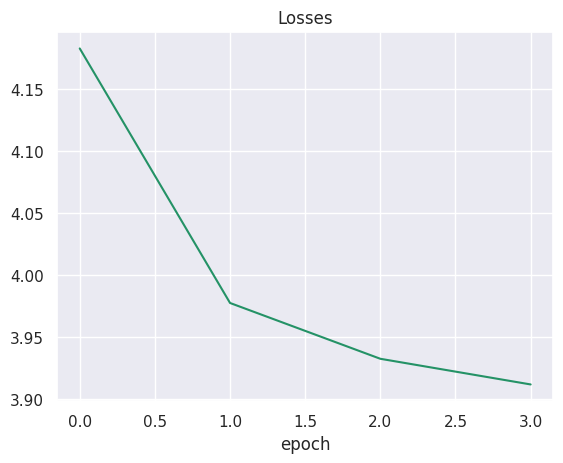

In [43]:
plt.plot(np.arange(len(losses)), losses)
plt.title('Losses')
plt.xlabel("epoch")
plt.show()

In [44]:
def greedy_generate(
    model: nn.Module,
    starting_seq: str,
    word2ind,
    ind2word,
    max_seq_len: int = 128
) -> str:
    device = next(model.parameters()).device
    model.eval()

    input_ids = [word2ind['<bos>']] + [word2ind.get(word, word2ind['<unk>']) for word in word_tokenize(starting_seq)]
    input_ids = torch.LongTensor(input_ids).unsqueeze(0).to(device)

    with torch.no_grad():
        for i in range(max_seq_len):
            next_char_distribution = model(input_ids)[0, -1]
            next_char = next_char_distribution.argmax()
            input_ids = torch.cat([input_ids, next_char.unsqueeze(0).unsqueeze(0)], dim=1)

            if next_char.item() == word2ind['<eos>']:
                break

    words = ' '.join([ind2word.get(idx.item(), '<unk>') for idx in input_ids[0]])
    return words

In [54]:
test1 = greedy_generate(model, starting_seq='me, myself and i ', word2ind=word2ind, ind2word=ind2word)
test2 = greedy_generate(model, starting_seq='so she can ', word2ind=word2ind, ind2word=ind2word)
test3 = greedy_generate(model, starting_seq='tell', word2ind=word2ind, ind2word=ind2word)
test4 = greedy_generate(model, starting_seq='do you want ', word2ind=word2ind, ind2word=ind2word)

print(test1)
print(test2)
print(test3)
print(test4)

<bos> me , myself and i ’ m not sure that i ’ m not <unk> . <eos>
<bos> so she can ’ t be <unk> . <eos>
<bos> tell me about the <unk> of the <unk> . <eos>
<bos> do you want to be a <unk> ? <eos>
